In [4]:
!pip install cloudant

    100% |████████████████████████████████| 61kB 7.5MB/s eta 0:00:01
Requirement not upgraded as not directly required: requests<3.0.0,>=2.7.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from cloudant)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0.0,>=2.7.0->cloudant)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0.0,>=2.7.0->cloudant)
Requirement not upgraded as not directly required: urllib3<1.23,>=1.21.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0.0,>=2.7.0->cloudant)
Requirement not upgraded as not directly required: certifi>=2017.4.17 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0.0,>=2.7.0->cloudant)
  Running setup.py bdist_wheel for cloudant ... done
  Stored in directory: /home/dsxuser/.cache/pi

In [11]:
# 1.  Connecting to the service instance.

# Enable the required Python libraries.

from cloudant.client import Cloudant
from cloudant.error import CloudantException
from cloudant.result import Result, ResultByKey
import numpy as np
import json
import time
import matplotlib.pyplot as plt



# Useful variables
serviceUsername = "###################-bluemix"
servicePassword = "#############################################################"
serviceURL = "https://#########################-bluemix.cloudant.com"
databaseName = "YourDatabase"

# Use the IBM Cloudant library to create an IBM Cloudant client.
client = Cloudant(serviceUsername, servicePassword, url=serviceURL)

# Connect to the server
client.connect()

# This is the name of the database we are working with.


myDatabaseDemo = client.create_database(databaseName)

# Simple and full retrieval of the first
# document in the database.
result_collection = Result(myDatabaseDemo.all_docs, include_docs=True)

Riskx = np.zeros(300)
Risky = np.zeros(300)
Riskz = np.zeros(300)
Frecx = np.zeros(300)
Frecy = np.zeros(300)
Frecz = np.zeros(300)
Ampx = np.zeros(300)
Ampy = np.zeros(300)
Ampz = np.zeros(300)

for i in range (0,300-1):

    var=result_collection[i]
    var1=var[0]
    var2=var1['doc']
    Riskx[i]=var2['RiskFx']
    Risky[i]=var2['RiskFy']
    Riskz[i]=var2['RiskFz']
    if (var2['MaxAx']<0.1 or var2['MaxFx'] < 0.1):
        Ampx[i]=0
        Frecx[i]=0
    else:
        Ampx[i]=var2['MaxAx']
        Frecx[i]=var2['MaxFx']
    if (var2['MaxAy']<0.1 or var2['MaxFy'] < 0.1):
        Ampy[i]=0
        Frecy[i]=0
    else:
        Ampy[i]=var2['MaxAy']
        Frecy[i]=var2['MaxFy']
    if (var2['MaxAz']<0.1 or var2['MaxFz'] < 0.1):
        Ampz[i]=0
        Frecz[i]=0
    else:
        Ampz[i]=var2['MaxAz']
        Frecz[i]=var2['MaxFz']
    time.sleep(0.2)
    
print("Finish :3")


# the result is a Python dictionary:

# 6.  Closing the connection to the service instance.

# Disconnect from the server
client.disconnect()


Finish :3


Red X axis, Blue Y Axis and Green Z Axis


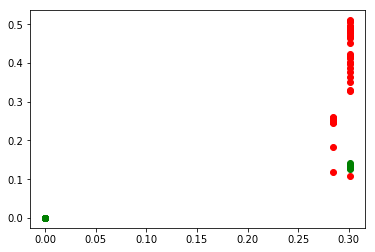

In [16]:
# Plot the data
print("Red X axis, Blue Y Axis and Green Z Axis")
plt.plot(Frecx, Ampx, 'ro', Frecy, Ampy, 'bo', Frecz, Ampz, 'go')

# Show the plot
plt.show()